# Стабилизация перевёрнутого маятника с подвижной осью подвеса<a class=tocSkip></a>
## Расчётно-графическая работа для лабораторного практикума. Задания. Часть 1. Маятник без управления. Линейные стратегии управления<a class=tocSkip></a>
**Автор: В. А. Костин**  
**2021 год**


$\newcommand{\ctg}{\mathop{\mathrm{ctg}}\nolimits}$
$\newcommand{\tg}{\mathop{\mathrm{tg}}\nolimits}$
$\newcommand{\arctg}{\mathop{\mathrm{arctg}}\nolimits}$
$\newcommand{\degree}{^{\circ}}$
$\renewcommand{\Re}{\mathop{\mathrm{Re}}\nolimits}$
$\renewcommand{\ctg}{\mathop{\mathrm{ctg}}\nolimits}$

# Задание 1. Инициализация параметров маятника

*Запишите в соответствующие переменные фамилию, имя и отчество выполняющего работу и номер зачётной книжки (без нулей спереди, этом номер будет использоваться как зерно генератора случайных чисел).* *После этого запустите на выполнение ячейки инициализации*, это можно сделать с помощью кнопки `Run all initialization cells` на панели инструментов (с пиктограммой, изображающей калькулятор). В результате выполнения этих ячеек будут исполнены подготовительные инструкции, подключены необходимые научные пакеты и вспомогательный модуль `control_theory`. Кроме этого будут созданы индивидуальные виртуальные маятники со случайно сгенерированными параметрами на основе предоставленного номера зачётной книжки. Эту же кнопку `Run all initialization cells` можно использовать для быстрой инициализации при повторном открытии сохранённого блокнота или при перезапуске ядра Python. Перед выходом или обновлением страницы используйте кнопку сохранения `Save and Checkpoint` (с пиктограммой, изображающей мягкий магнитный диск) или соответствующий пункт в меню `File`. Запустить отдельную выделенную ячейку или несколько ячеек на выполнение можно с помощью сочетания клавиш `Shift` и `Enter`.

## Решение

In [7]:
student_first_name = 'Виталий'
student_father_name = 'Витальевич'
student_last_name = 'Манухов'
student_id = 7

###### Подключение и настройка необходимых модулей, инициализация маятника со случайно сгенерированными параметрами

In [2]:
# Подключение объектов из библиотек numpy и matplotlib для более удобной
# дальнейшей интерактивной работы
from pylab import *

# Подключение объектов из вспомогательного модуля control_theory
from control_theory import *

# Импорт функции `HTML` для отображения произвольного кода HTML в выводе
# ячейки
from IPython.display import HTML, Video, Image

In [3]:
# Настройка вывода рисунков Matplotlib для интерактивной работы. Параметр
# inline указывает на то, что рисунки matplotlib должны быть встроены как
# растровые изображения, для интерактивных рисунков на javascript можно
# использовать параметр notebook вместо inline. Команда %matplotlib --list
# выводит список возможных типов вывода (бэкендов).
%matplotlib inline

# Настройка размеров и разрешения рисунков (960x720 по умолчанию, можно
# изменить для комфортной работы на мониторах с малым разрешением)
rcParams['figure.figsize'] = (9.6, 7.2) # Размер рисунков по умолчанию
rcParams['figure.dpi'] = 100 # Разрешение рисунков по умолчанию

rcParams['animation.embed_limit'] = 2.5 # Максимальный размер анимации в МБ
rcParams['animation.html'] = 'html5' # Представление анимаций matplotlib 

In [8]:
# Инициализация индивидуального маятника обучающегося
ps = Pendulum(student_id)

# Вывод параметров маятника
print(('alpha = {0:.5g}\nOmega = {1:.5g}\nOmega^2 = {2:.5g}\n' +
       'lambda = {3:.5g}\nmu = {4:.5g}\nnu = {5:.5g}').
        format(ps.alpha, ps.omega, ps.omega ** 2, ps.lambd, ps.mu, ps.nu))

alpha = 0.68996
Omega = 0.41446
Omega^2 = 0.17178
lambda = 0.13619
mu = 0.14495
nu = 0.053841


# Задание 2. Движение маятника без управления с разными начальными условиями
<a id="sec:pr2"></a>

Рассмотрите поведение маятника `ps` с нулевым управлением для нескольких вариантов начальных условий. Рассмотрите начальные условия, в которых $\dot\varphi(t = 0) \neq 0$. *Приведите примеры (в виде графика или анимации) случаев,*
- *когда маятник не совершает полного оборота и сразу совершает колебания около нижнего состояния равновесия и*
- *когда маятник совершает один полный оборот при движении от начального состояния к нижнему положению равновесия.*

Для расчёта временной эволюции состояния маятника можно использовать функцию `integrate`, описанную в&nbsp;[приложении&nbsp;4.16](files/supplementary_materials.html#integrate). Пример использования этой функции можно увидеть в&nbsp;[приложении&nbsp;5.2](files/supplementary_materials.html#sec:ex1). Для представления результатов расчёта можно использовать стандартную функцию для построения графиков `plot` из пакета Matplotlib и описанную в разделе&nbsp;[приложении&nbsp;4.17](files/supplementary_materials.html#animate_pendulum) функцию `animate_pendulum` для построения анимаций движения маятника на каретке (см. примеры использования в [приложении&nbsp;5.2](files/supplementary_materials.html#sec:ex1), примеры использования функции `plot` можно также увидеть в [приложении&nbsp;3.2](files/supplementary_materials.html#sec:ex_plot) и [приложении&nbsp;3.3](files/supplementary_materials.html#sec:ex_subplot)).

## Решение

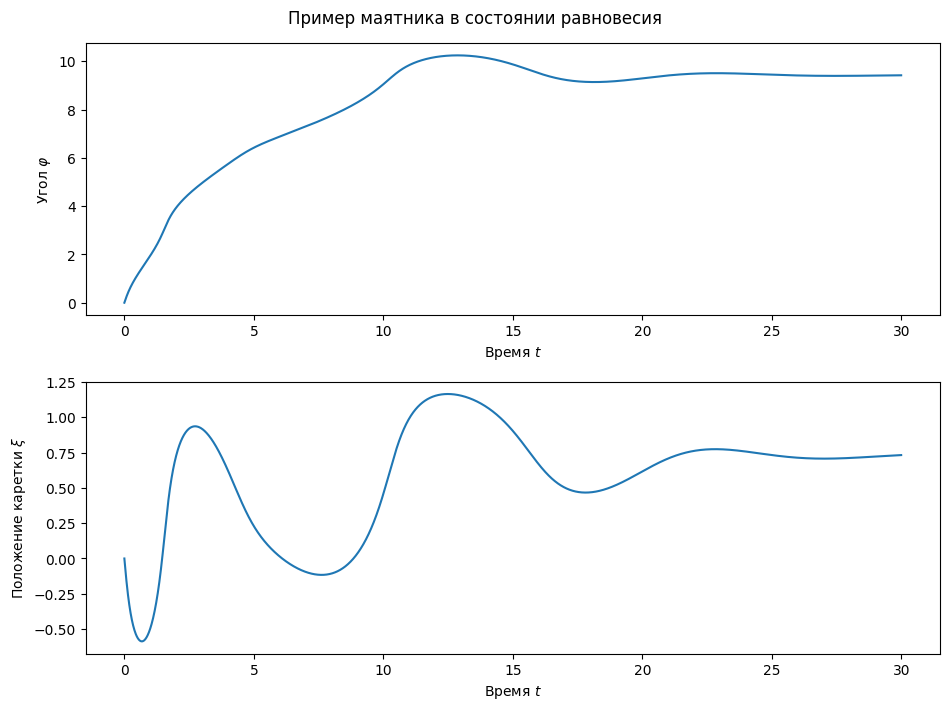

In [75]:
c0 = LinearStateControl(4, 1)
t, y = integrate(ps, c0, x0=[0., 3.2, 0., -2.1], v0=empty(0), dt=0.01, T=30,
                 N=1)

subplot(2, 1, 1)
plot(t, y[:, 0])
xlabel(r'Время $t$')
ylabel(r'Угол $\varphi$')
subplot(2, 1, 2)
plot(t, y[:, 2])
xlabel(r'Время $t$')
ylabel(r'Положение каретки $\xi$')
suptitle(r'Пример маятника в состоянии равновесия')
tight_layout();

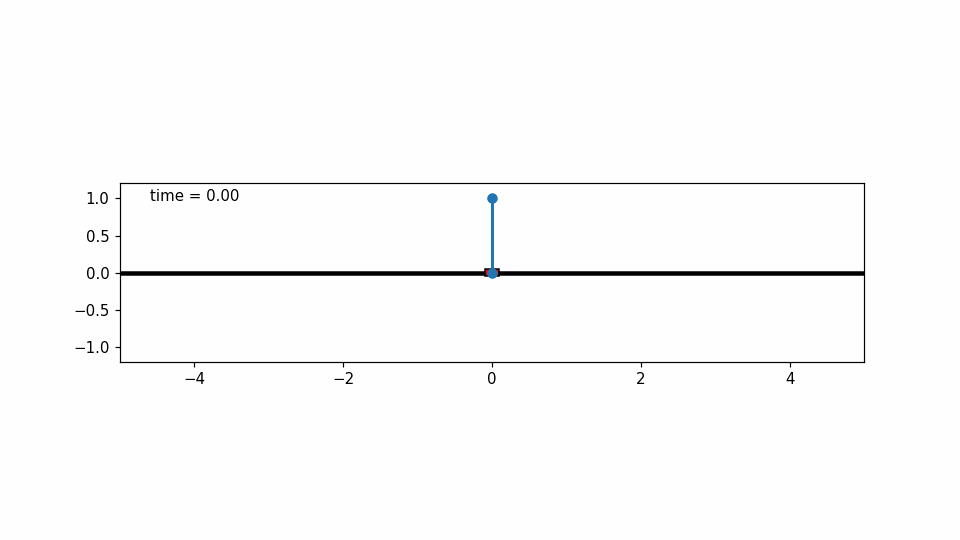

In [82]:
anim = animate_pendulum(t, y, spacing=15, invsec=1,
                        filename='test.gif', xlim = (-5, 5))
Image('test.gif')
#HTML(anim.to_jshtml())

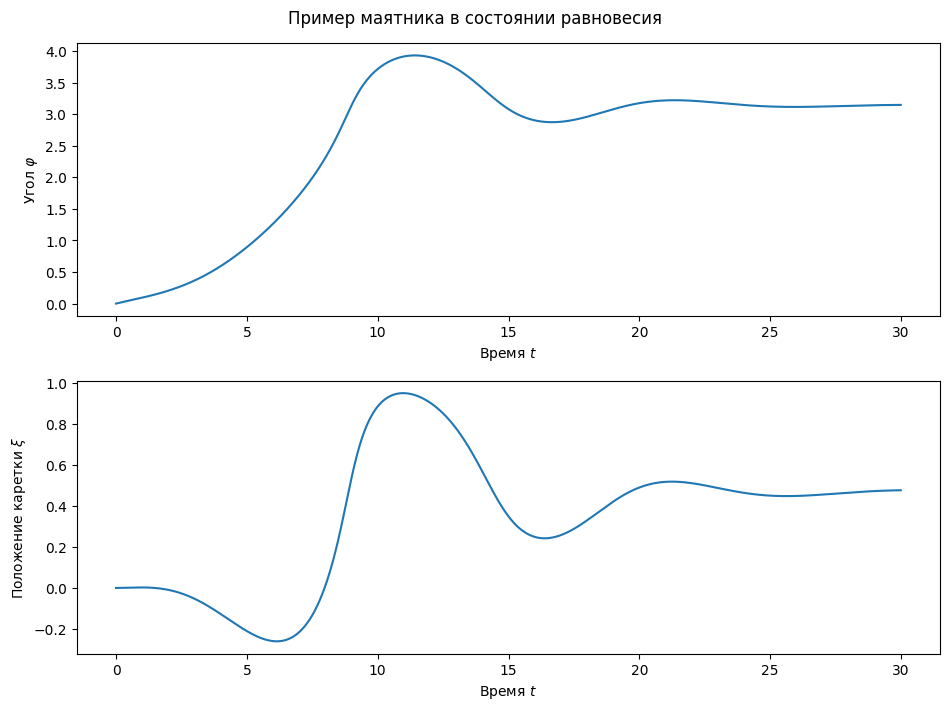

In [84]:
c0 = LinearStateControl(4, 1)
t, y = integrate(ps, c0, x0=[0., 0.1, 0., 0.], v0=empty(0), dt=0.01, T=30,
                 N=1)

subplot(2, 1, 1)
plot(t, y[:, 0])
xlabel(r'Время $t$')
ylabel(r'Угол $\varphi$')
subplot(2, 1, 2)
plot(t, y[:, 2])
xlabel(r'Время $t$')
ylabel(r'Положение каретки $\xi$')
suptitle(r'Пример маятника в состоянии равновесия')
tight_layout();

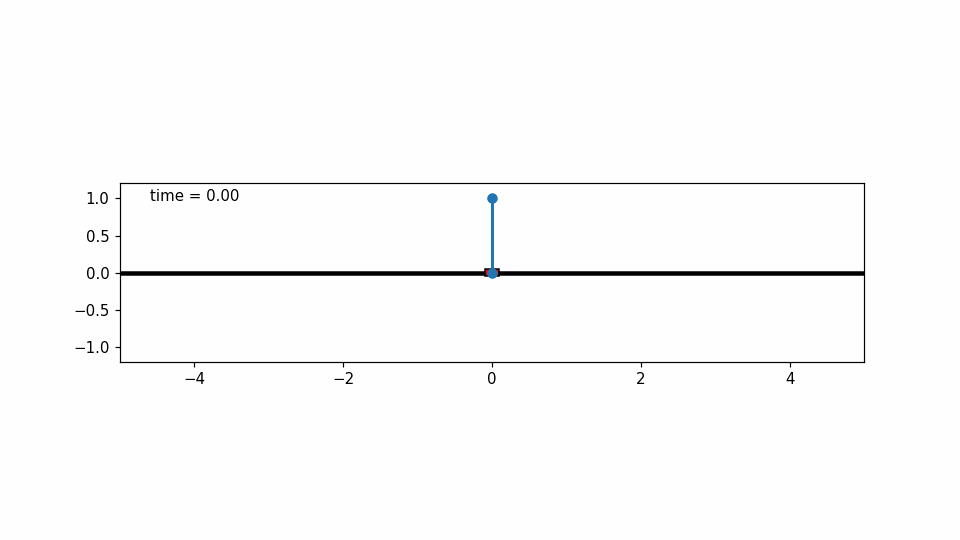

In [85]:
anim = animate_pendulum(t, y, spacing=15, invsec=1,
                        filename='test.gif', xlim = (-5, 5))
Image('test.gif')
#HTML(anim.to_jshtml())

# Задание 3. Линеаризация
<a id="sec:pr3"></a>

Изучение линейных регуляторов для рассматриваемой системы разумно начать с простого частного случая, когда трение о внешнюю среду отсутствует, то есть $\mu = \nu = 0$, при этом трение в оси подвеса может быть ненулевым, $\lambda \geqslant 0$. Этот случай будет дальше изучаться во всех заданиях, кроме последнего. При отсутствии трения о внешнюю среду систему&nbsp;[$(5)$](files/description.html#mjx-eqn-eqodephi) и [$(6)$](files/description.html#mjx-eqn-eqodexi) можно свести к одному уравнению второго порядка для $\varphi$, при этом $\ddot\xi$ может быть выражено через $\varphi$, $\dot\varphi$ и $u$. *Получите соответствующие уравнения для $\varphi$ и линеаризуйте их вблизи состояния равновесия $\varphi = 0$, $\dot\varphi = 0$.*

## Решение

***Добавьте описание процедуры решения.***

Ответ: нелинейное уравнение для $\varphi$ имеет вид
$$\left(1 - \alpha\cos^2\varphi\right) \ddot\varphi + \lambda\dot\varphi - \Omega^2\sin\varphi + \alpha\dot\varphi^2\sin\varphi \cos\varphi + u\cos\varphi = 0;$$
его линеаризация&nbsp;
$$(1 - \alpha) \ddot\varphi + \lambda\dot\varphi - \Omega^2\varphi = -u.$$

# Задание 4. Линейное управление по состоянию
<a id="sec:pr4"></a>

При $\mu = \nu = 0$ уравнение для $\varphi$ в случае малых отклонений от верхнего положения равновесия имеет вид
$$
(1 - \alpha) \ddot\varphi + \lambda\dot\varphi - \Omega^2\varphi = -u.
$$
Простейшее линейное управление имеет вид $u = k_0\varphi + k_1\dot\varphi$ (управление по состоянию угловой подсистемы). После подстановки $u$ в таком виде в предыдущее уравнение получим
$$
\ddot\varphi + \frac{\lambda + k_1}{1 - \alpha}\dot\varphi + \frac{k_0 - \Omega^2}{1 - \alpha}\varphi = 0.
$$
Как видно из этого уравнения, состояние равновесия $\varphi = 0$, $\dot\varphi = 0$ оказывается стабильным при $k_0 > \Omega^2$ и $k_1 > -\lambda$. При этих условиях уравнение фактически является уравнением гармонического осциллятора с затуханием. При этом точка $(\varphi, \dot\varphi) = (0, 0)$ может быть устойчивым фокусом или устойчивым узлом. В первом случае процесс установления происходит с переколебаниями (квазигармонически) и значение $\varphi$ бесконечное число раз обращается в $0$, а во-втором чисто ангармонически и значение $\varphi$ обращается в $0$ не более одного раза. *Запишете аналитические условия, при которых процесс установления является квазигармоническим (с бесконечным числом переколебаний), и при которых&nbsp;— ангармоническим.*

## Решение

***Запишите ответ.***

# Задание 5. Динамика угла отклонения при стабилизации перевёрнутого маятника
<a id="sec:pr5"></a>

Следующая ячейка создаёт маятник `ps2`. В новом маятнике значения `mu` и `nu` полагаются нулевыми, что соответствуют маятнику без трения о внешнюю среду с $\mu = \nu = 0$. Остальные параметры в маятнике `ps2` такие же, как и в маятнике `ps`. Для маятника `ps2` рассмотрите динамику стабилизации, построив временные зависимости угла отклонения $\varphi$ и управления $u$ для различных начальных условий и различных значения $k_0$ и $k_1$. *Приведите два примера стабилизации положения маятника с разными $k_0$ и $k_1$,*
- *в одном случае маятник должен приходить к состоянию равновесия ангармонически, совершая не более одного переколебания,*
- *в другом&nbsp;— квазигармонически, совершая экспоненциально затухающие колебания.*

*Приведите также пример, в котором несмотря на то что верхнее положение оказывается стабильным, $k_0 > \Omega^2$ и $k_1 > -\lambda$, маятник не приходит в верхнее положение равновесия из-за существенного начального отклонения.* Пример использования функции `integrate` для расчёта маятника с управлением по углу можно увидеть в&nbsp;[приложении&nbsp;5.3](files/supplementary_materials.html#sec:ex2).

## Инициализация маятника без трения о внешнюю среду для использования в заданиях 5 и 7

In [7]:
ps2 = Pendulum(student_id)
ps2.mu = 0.
ps2.nu = 0.

# Вывод параметров маятника
print(('alpha = {0:.5g}\nOmega = {1:.5g}\nOmega^2 = {2:.5g}\n' +
       'lambda = {3:.5g}').
        format(ps2.alpha, ps2.omega, ps2.omega ** 2, ps2.lambd))

alpha = 0.65759
Omega = 1.1232
Omega^2 = 1.2616
lambda = 0.13476


## Решение

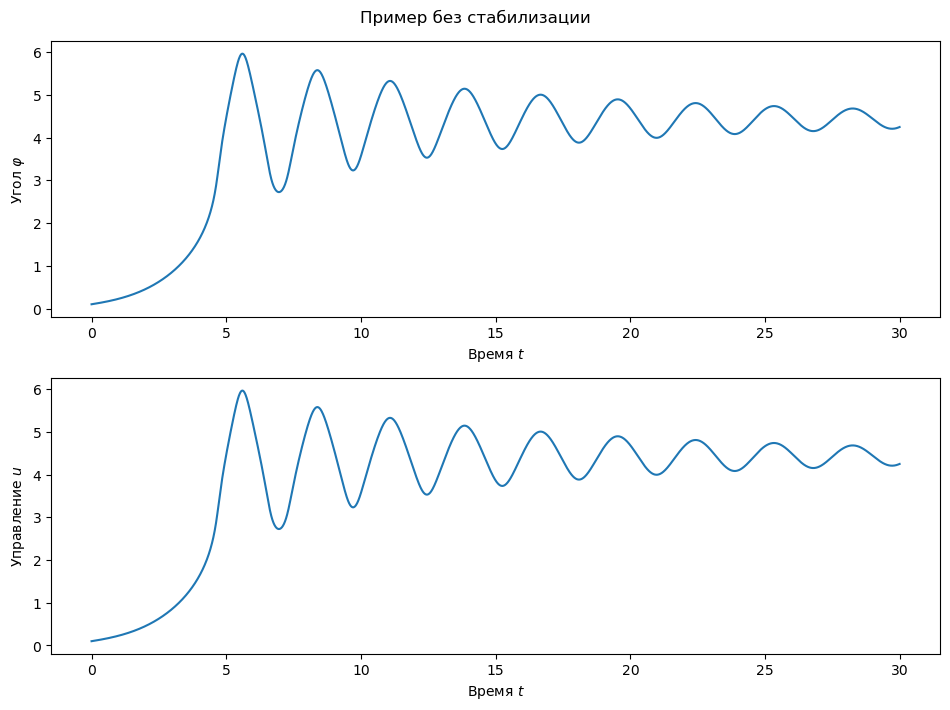

In [8]:
c = LinearStateControl(4, 1, [1., 0., 0., 0.])
x0 = [0.1, 0.1, 0., 0.]
t, y, u = integrate(ps2, c, x0=x0, v0=empty(0), dt=0.01, T=30, N=1,
                    return_control=True)

subplot(2, 1, 1)
plot(t, y[:, 0])
xlabel(r'Время $t$')
ylabel(r'Угол $\varphi$')
subplot(2, 1, 2)
plot(t, u[:, 0])
xlabel(r'Время $t$')
ylabel(r'Управление $u$')
suptitle(r'Пример без стабилизации')
tight_layout();

# Задание 6. Фазовые портреты нелинейной системы

*С помощью функции `streamplot` библиотеки `matplotlib` постройте на плоскости $(\varphi, \dot\varphi)$ фазовый портрет нелинейной системы без управления и два фазовых портрета замкнутых нелинейных систем (с управлением вида $u = k_0 \varphi + k_1 \dot \varphi$ и $\mu = \nu = 0$), отвечающих значениям $k_0$ и $k_1$ из предыдущего задания (для квазигармонического и ангармонического процессов установления).* Пример использования функции `streamplot` приведён в&nbsp;[разделе&nbsp;3.4](files/supplementary_materials.html#sec:ex_streamplot).

## Решение

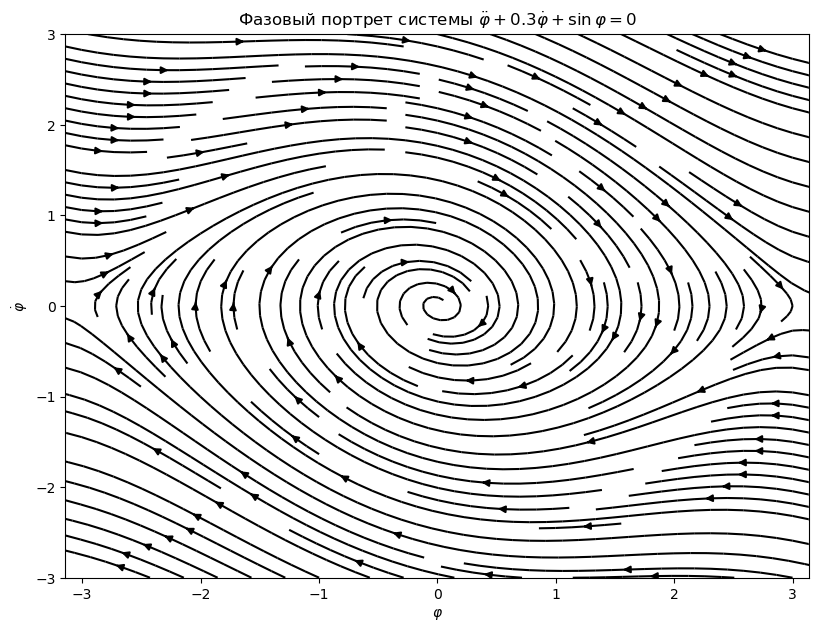

In [9]:
# Создание сеток переменных 201 на 201 элемента
phi, dphi = meshgrid(linspace(-pi, pi, 201), linspace(-3., 3., 201))

# Вычисление вертикальной компоненты векторного поля (горизонтальная
# компонента равна dphi и её не нужно специально вычислять)
ddphi = -sin(phi) - 0.3 * dphi

# Построение фазовой плоскости: первые два аргумента задают сетку значений
# абсцисс и ординат, следующие два аргумента задают горизонтальную и
# вертикальную компоненты векторного поля
streamplot(phi, dphi, dphi, ddphi, density=1.5, color='k')

xlabel(r'$\varphi$')
ylabel(r'$\dot\varphi$')
title(r'Фазовый портрет системы $\ddot\varphi + 0.3\dot\varphi + ' +
      r'\sin\,\varphi = 0$');

# Задание 7. Одновременная стабилизация положения маятника и тележки
<a id="sec:pr7"></a>

С помощью управления вида $u = k_0 \varphi_0 + k_1 \varphi_1$ невозможно стабилизорать положение каретки. Это следует из того, что исходный объект управление нейтрален относительно изменения положения каретки, а само управление от этого положения не зависит и, таким образом, не может обеспечить обратную связь. Более формальный подход основан на понятии наблюдаемости, которое будет введено в более поздних частях курса. Стабилизировать положение каретки можно с помощью более общего линейного управления вида $u = k_0 \varphi_0 + k_1 \varphi_1 + k_2 \xi + k_3 \dot\xi$. Характеристический полином матрицы замкнутой системы $\mathbf A + \mathbf B \mathbf k^T$ имеет вид
$$
Q(p) = p^4 + \frac{\lambda  + \mu - 2\alpha  \nu + k_1 - k_3}{1 - \alpha} p^3 + \left[-\frac{\Omega^2 + \alpha\nu ^2 - \lambda\mu}{1 - \alpha} + \alpha \frac{(\mu - \nu)^2}{(1 - \alpha)^2} + \frac{k_0 + \nu k_1 - k_2}{1- \alpha} - \left(\frac{\lambda}{1 - \alpha} + \alpha \frac{\mu - \nu}{(1 - \alpha)^2}\right)k_3\right] p^2 + \left[-\frac{\mu\Omega^2}{1 - \alpha} + \frac{\nu k_0 + k_3\Omega^2}{1- \alpha} - \left(\frac{\lambda}{1 - \alpha} + \alpha \frac{\mu - \nu}{(1 - \alpha)^2}\right)k_2\right] p + \frac{\Omega^2 k_2}{1 - \alpha}.
$$
Сравнивая этот полином с полиномом 4-й степени общего вида, можно убедиться, что выбором коэффициентов $k_0$, $k_1$, $k_2$ и $k_3$ этот характеристический полином можно привести к любому наперёд заданному полиному 4-й степени с действительными коэффициентами. Как будет объяснено в дальнейших частях курса, этот факт является следствием свойства полной управляемости системы. Таким образом, выбором коэффициентов $k_0$, $k_1$, $k_2$ и $k_3$ можно стабилизировать замкнутую систему. Характеристический полином сильно упрощается при $\mu = \nu = 0$. *Для этого случая найдите значения коэффициентов $k_0$, $k_1$, $k_2$ и $k_3$, соответствующие характеристическим полиномам $Q(p) = (p + 1)(p + 2)(p + 3)(p + 4) = p^4 + 10p^2 + 35p^2 + 50p + 24$ и $Q(p) = (p + 1 + i)(p + 1 - i)(p + 4 - i)(p + 4 + i) = p^4 + 10p^3 + 35p^2 + 50p + 34$. Для маятника `ps2` проиллюстрируйте динамику стабилизации, построив временные зависимости угла отклонения $\varphi$, нормированного положения каретки $\xi$ и управления $u$ для указанных двух полиномов. Не меняя управления, замените маятник `ps2` без трения о внешнюю среду на маятник `ps` (в котором такое трение присутствует) и сравните результаты. Может ли трение приводить к потере устойчивости?*

## Решение

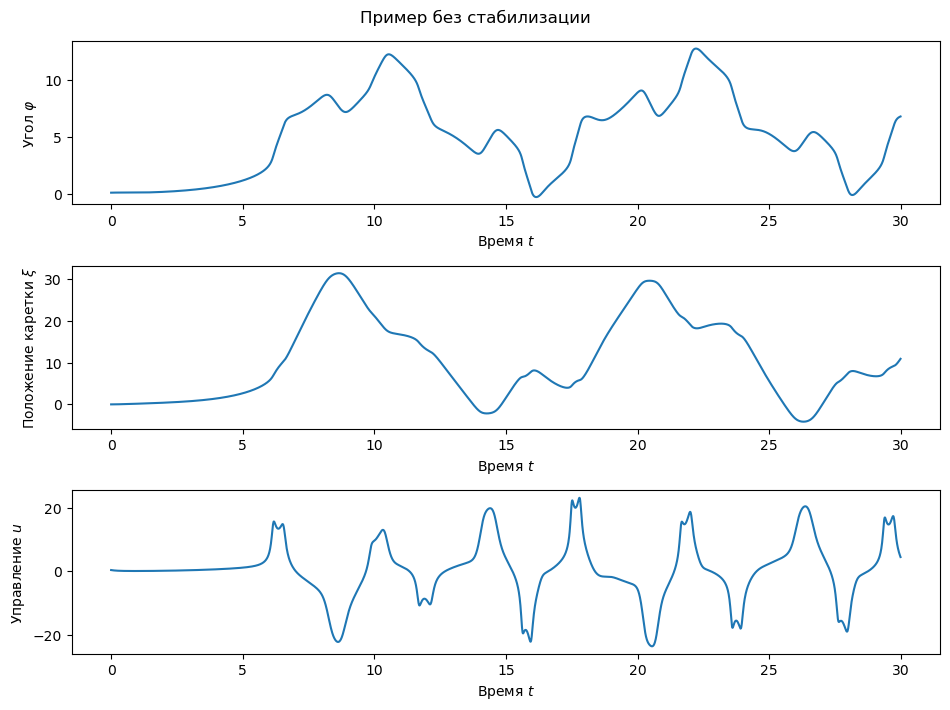

In [10]:
c = LinearStateControl(4, 1, [2., 2., -1, 0.])
x0 = [0.1, 0.1, 0., 0.]
t, y, u = integrate(ps2, c, x0=x0, v0=empty(0), dt=0.01, T=30, N=1,
                    return_control=True)

subplot(3, 1, 1)
plot(t, y[:, 0])
xlabel(r'Время $t$')
ylabel(r'Угол $\varphi$')
subplot(3, 1, 2)
plot(t, y[:, 2])
xlabel(r'Время $t$')
ylabel(r'Положение каретки $\xi$')
subplot(3, 1, 3)
plot(t, u[:, 0])
xlabel(r'Время $t$')
ylabel(r'Управление $u$')
suptitle(r'Пример без стабилизации')
tight_layout();